In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 4.7 MB/s eta 0:00:00


# Preprocessing basic with emoji handling and lemitisation

In [6]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('emoji')

def preprocess_tweet(text):
    # Convert to lowercase
    text = text.lower()

    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove hashtags
    text = re.sub(r'#([^\s]+)', '', text)

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", re.UNICODE)

    text = emoji_pattern.sub(r'', text)

    # Remove punctuation, special characters, and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization using TweetTokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Check the length of the preprocessed text
    if len(lemmatized_tokens) > 2:  # Adjust the threshold as needed
        return ' '.join(lemmatized_tokens)
    else:
        return None

# Read the dataset
df = pd.read_csv("/content/modi_reviews.csv")

# Preprocess the 'Tweet' column
df['preprocessed_tokens'] = df['Tweet'].apply(lambda x: preprocess_tweet(str(x)))

# Remove rows with None in 'preprocessed_tokens' (outliers)
df = df[df['preprocessed_tokens'].notna()]

# Show some preprocessed data to verify preprocessing
print("Sample of Preprocessed Data:")
print(df['preprocessed_tokens'].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading emoji: Package 'emoji' not found in index


Sample of Preprocessed Data:
0    seeing future spokesperson good luck anjana om...
1    rd may reveal even ecisveep could help modi wi...
2    rd may reveal even could help modi win janatab...
3    pm modi creates new record pm democratic count...
4    appointment successor god forbid allow bjp sto...
5               following top priority modi government
6    yr modi sc v sc ec v ec medium v medium rbi v ...
7    still remember video massage disappointed lost...
8    much think modi spends tax money fake photogra...
9               bjp nda take screen shot rd may result
Name: preprocessed_tokens, dtype: object


In [17]:
!pip install joblib==0.14.1
!pip install pyLDAvis==2.1.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 0.14.1 which is incompatible.
pyldavis 3.4.1 requires joblib>=1.2.0, but you have joblib 0.14.1 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 0.14.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=e096eaf153ac72e988a93150cd35762de1bce4875e7f6b488fb516437910bfa3
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1


In [8]:
pip install pandas gensim pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# here's the code to extract and display the top 15 topics as text:

In [18]:
import pandas as pd
from gensim import corpora, models

# Read the dataset
df = pd.read_csv("modi_reviews.csv")

# Filter out NaN values and convert tweets to strings
df['Tweet'] = df['Tweet'].astype(str)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['Tweet'].str.split())
corpus = [dictionary.doc2bow(text) for text in df['Tweet'].str.split()]

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)

# Extract and display the top 15 topics
topics = lda_model.show_topics(num_topics=15, num_words=10, formatted=False)

for idx, topic in topics:
    print(f"Topic {idx + 1}:")
    print(', '.join([word[0] for word in topic]))
    print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
@nsitharaman, @yadavakhilesh, @Mayawati, becoming, Sir., plan, etc, @OmarAbdullah, attacks, schemes


Topic 2:
@narendramodi, @BJP4India, @AmitShah, @PMOIndia, @RahulGandhi, #NarendraModi, #LokSabhaElections2019, @INCIndia, #MainBhiChowkidar, #BJP


Topic 3:
to, the, of, @narendramodi, is, in, and, a, for, PM


Topic 4:
credit, turnout, Happy, air, shri, outside, RSS-BJP, achieved, tomorrow., Security


Topic 5:
#Karnataka, revenge, @Ramlal, #LokSabhaElections2019⁠, ashamed, @digvijaya_28, ⁠, OUR, sections, visiting


Topic 6:
interview, #NaMoAgain, congress, ppl, Very, doing, read, with, why, calling


Topic 7:
poverty, #ArvindKejriwal, Tamil, Keep, jai, Lets, Rs., looted, fighter, @KPadmaRani1


Topic 8:
INDIA, TO, OF, @adgpi, NOT, @rashtrapatibhvn, @AmitShahOffice, @indiatvnews, ek, FOR


Topic 9:
Prime, Minister, April, address, |, meeting, #NOTA, IT, public, addressing


Topic 10:
@priyankac19, sir,, justice, @AnupamPKher, propaganda, India?, cant, channels, kindly, answe

# Compute Coherance score of LDA

In [21]:

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Tweet'].str.split(), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f"Coherence Score: {coherence_lda}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.5372340362533925


# Topic based on highest probability

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


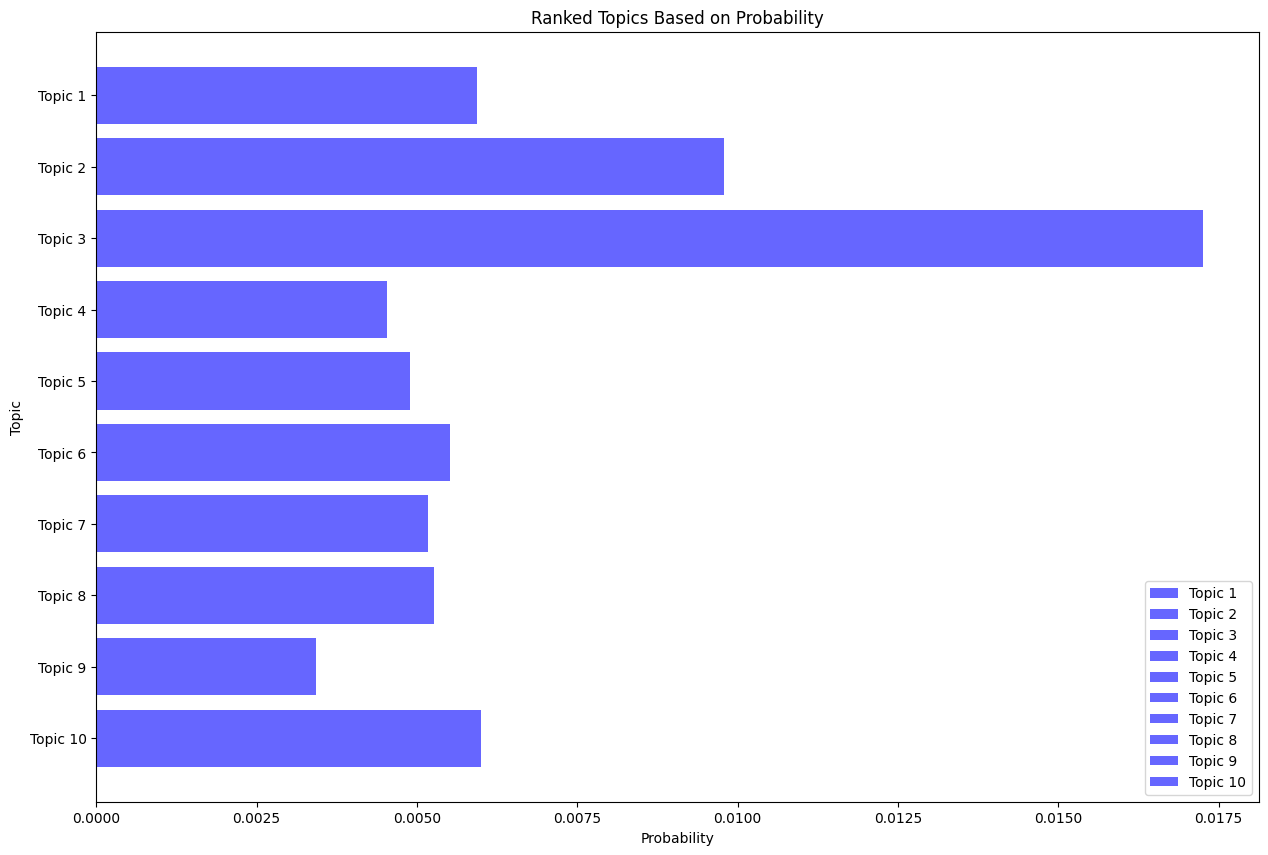

In [22]:

# Extract and sort the topics based on highest to lowest probability
lda_model_topics = lda_model.show_topics(formatted=False)
topics = [[word[0] for word in topic[1]] for topic in lda_model_topics]
probs = [[word[1] for word in topic[1]] for topic in lda_model_topics]

# Sort topics based on highest probability
sorted_topics = [x for _, x in sorted(zip(probs, topics), reverse=True)]

# Create a bar plot for the sorted topics
fig, ax = plt.subplots(figsize=(15, 10))

for i, topic in enumerate(sorted_topics):
    words = [word for word in topic]
    probabilities = [prob for prob in probs[i]]

    ax.barh([f"Topic {i+1}"], probabilities[-1], color='blue', alpha=0.6, label=f"Topic {i+1}")

ax.set_xlabel('Probability')
ax.set_ylabel('Topic')
ax.set_title('Ranked Topics Based on Probability')
ax.invert_yaxis()
ax.legend()

plt.show()


# Compute coherence score for each topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1 (Coherence Score: 0.7123176446531895):
hai, ki, ko, ka, ke, #Vote4BJP, se, bhi, me, hi


Topic 2 (Coherence Score: 0.6035707138519465):
poverty, #ArvindKejriwal, Tamil, Keep, jai, Lets, Rs., looted, fighter, @KPadmaRani1


Topic 3 (Coherence Score: 0.5649909869949172):
credit, turnout, Happy, air, shri, outside, RSS-BJP, achieved, tomorrow., Security


Topic 4 (Coherence Score: 0.5310491460487512):
@priyankac19, sir,, justice, @AnupamPKher, propaganda, India?, cant, channels, kindly, answers


Topic 5 (Coherence Score: 0.4613157582570393):
#Karnataka, revenge, @Ramlal, #LokSabhaElections2019⁠, ashamed, @digvijaya_28, ⁠, OUR, sections, visiting


Topic 6 (Coherence Score: 0.44819840240928494):
INDIA, TO, OF, @adgpi, NOT, @rashtrapatibhvn, @AmitShahOffice, @indiatvnews, ek, FOR


Topic 7 (Coherence Score: 0.4443405765489695):
vs, this., #LokSabha, terrorists, list, prove, Vs, #RafaleScam, Shah, terror


Topic 8 (Coherence Score: 0.43563653000857305):
Prime, Minister, April, addre

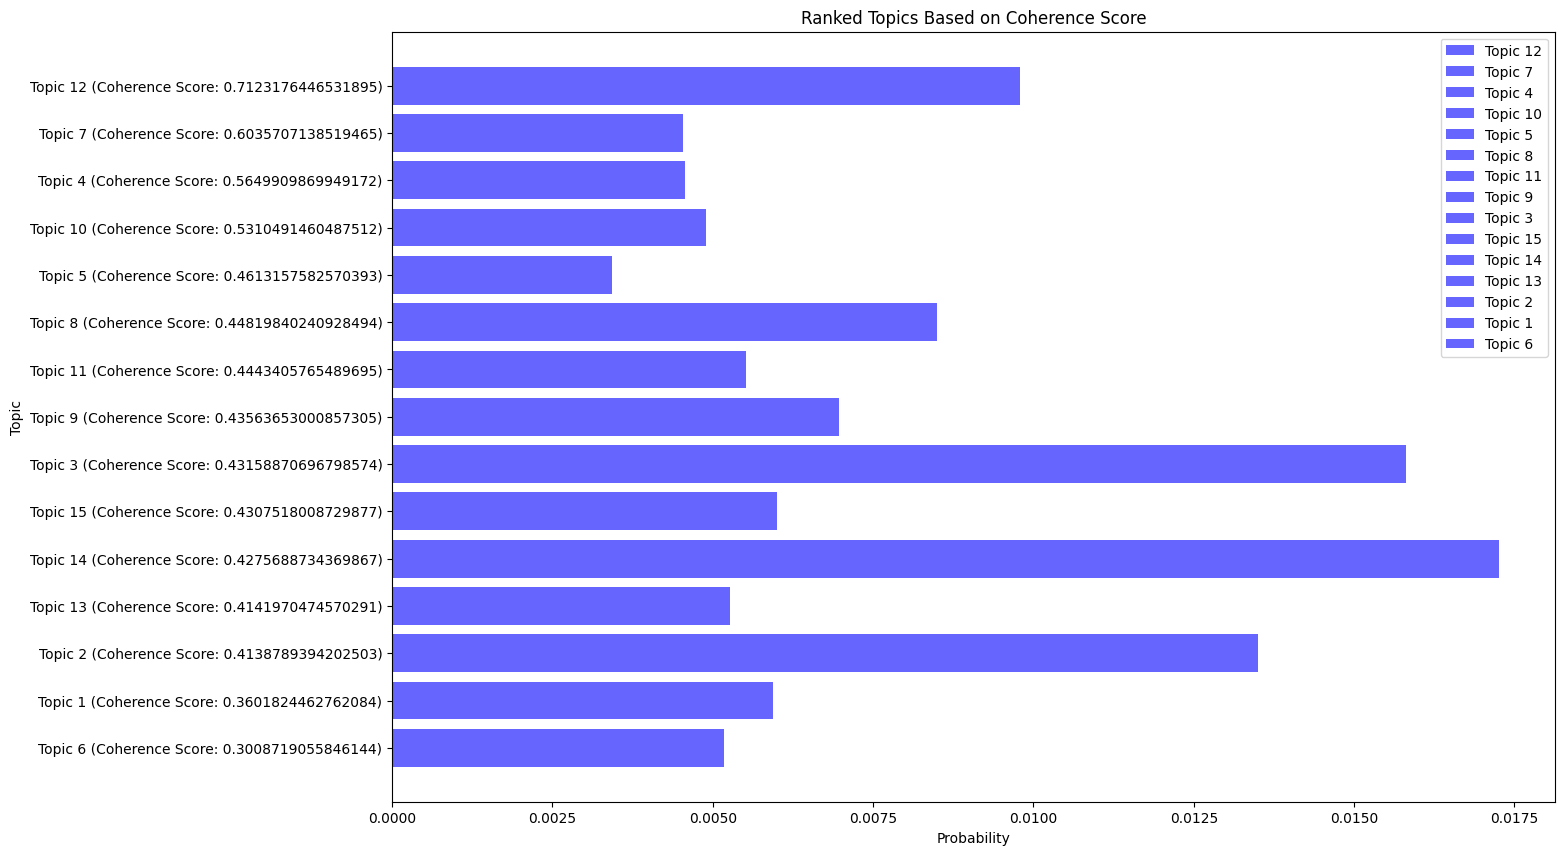

In [23]:

# Compute coherence score for each topic
coherence_scores = []
for i in range(15):
    topic_words = [word[0] for word in lda_model.show_topic(i, topn=10)]
    cm = CoherenceModel(topics=[topic_words], texts=df['Tweet'].str.split(), dictionary=dictionary, coherence='c_v')
    coherence_scores.append(cm.get_coherence())

# Sort topics based on coherence score from highest to lowest
sorted_topics = [x for _, x in sorted(zip(coherence_scores, range(15)), reverse=True)]

# Extract and display the top 15 topics based on highest coherence score
topics = [lda_model.show_topic(topic_num, topn=10) for topic_num in sorted_topics]

for idx, topic in enumerate(topics):
    print(f"Topic {idx + 1} (Coherence Score: {coherence_scores[sorted_topics[idx]]}):")
    print(', '.join([word[0] for word in topic]))
    print("\n")

# Create a bar plot for the sorted topics based on coherence score
fig, ax = plt.subplots(figsize=(15, 10))

for i, topic_num in enumerate(sorted_topics):
    words = [word[0] for word in topics[i]]
    probabilities = [word[1] for word in topics[i]]

    ax.barh([f"Topic {topic_num + 1} (Coherence Score: {coherence_scores[topic_num]})"], probabilities[-1], color='blue', alpha=0.6, label=f"Topic {topic_num + 1}")

ax.set_xlabel('Probability')
ax.set_ylabel('Topic')
ax.set_title('Ranked Topics Based on Coherence Score')
ax.invert_yaxis()
ax.legend()

plt.show()



#A high probability for a topic does not necessarily mean that the topic is semantically coherent or meaningful. The probability of a topic is based on the frequency of words in the corpus that are assigned to that topic. On the other hand, the coherence score measures the semantic similarity between high-scoring words in the topic.

# It's possible for a topic to have a high probability (i.e., frequent words) but a low coherence score if those frequent words do not semantically co-occur or form a meaningful and interpretable topic.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

Topic 1 (Coherence Score: 0.44247531062081347, Probability: {'a': -0.6613064306659808, 'you': -0.38199312352051723, 'and': 0.3770661565738349, 'is': 0.2235520770110457, 'I': -0.16398917631598028, 'PM': -0.15598926302525082, 'to': 0.15194480404997057, 'will': -0.11892819374194687, 'as': -0.11711600497301335, 'in': 0.108416305691775}):
a, you, and, is, I, PM, to, will, as, in


Topic 2 (Coherence Score: 0.42585419726720974, Probability: {'the': -0.6575380414183913, 'to': 0.5531399346004927, 'of': -0.3790107082696011, '@narendramodi': 0.1763130592053535, 'you': 0.13071220653299803, 'for': 0.09702975233211969, 'I': 0.09320550825415404, 'and': 0.08307822312173474, 'vote': 0.05371867704277987, '#LokSabhaElections2019': 0.04761951632591503}):
the, to, of, @narendramodi, you, for, I, and, vote, #LokSabhaElections2019


Topic 3 (Coherence Score: 0.42424579156759135, Probability: {'the': 0.40566219277048915, 'to': 0.3981259709369236, 'of': 0.32615438349886117, 'in': 0.25676660047694144, '@narend

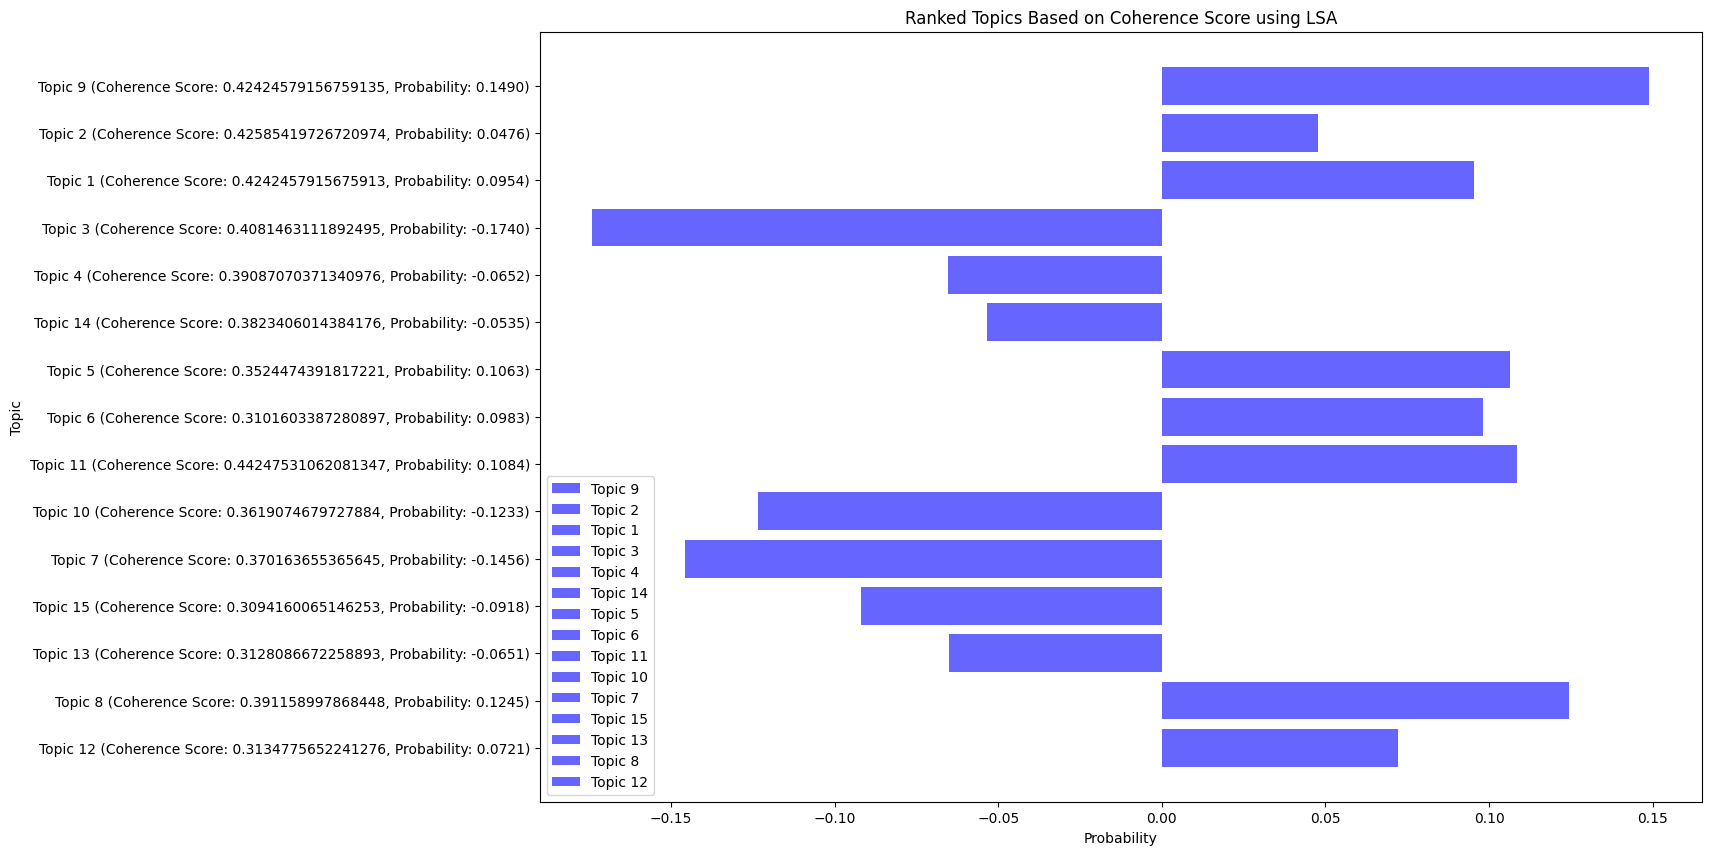

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# Read the dataset
df = pd.read_csv("modi_reviews.csv")

# Filter out NaN values and convert tweets to strings
df['Tweet'] = df['Tweet'].astype(str)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['Tweet'].str.split())
corpus = [dictionary.doc2bow(text) for text in df['Tweet'].str.split()]

# Build LSA model
lsa_model = models.LsiModel(corpus, num_topics=15, id2word=dictionary)

# Compute coherence score for each topic
coherence_scores = []
probabilities = []

for i in range(15):
    topic_words = [word[0] for word in lsa_model.show_topic(i, topn=10)]
    cm = CoherenceModel(topics=[topic_words], texts=df['Tweet'].str.split(), dictionary=dictionary, coherence='c_v')
    coherence_scores.append(cm.get_coherence())

    topic_prob = lsa_model.show_topic(i, topn=10)
    topic_prob = {word[0]: word[1] for word in topic_prob}
    probabilities.append(topic_prob)

# Sort topics based on coherence score from highest to lowest
sorted_topics = [x for _, x in sorted(zip(coherence_scores, range(15)), reverse=True)]

# Extract and display the top 15 topics based on highest coherence score
topics = [lsa_model.show_topic(topic_num, topn=10) for topic_num in sorted_topics]

for idx, topic in enumerate(topics):
    print(f"Topic {idx + 1} (Coherence Score: {coherence_scores[sorted_topics[idx]]}, Probability: {probabilities[sorted_topics[idx]]}):")
    print(', '.join([word[0] for word in topic]))
    print("\n")

# Create a bar plot for the sorted topics based on coherence score
fig, ax1 = plt.subplots(figsize=(15, 10))

for i, topic_num in enumerate(sorted_topics):
    words = [word[0] for word in topics[i]]
    coherence_score = coherence_scores[i]
    probability = list(probabilities[i].values())[-1]

    ax1.barh([f"Topic {topic_num + 1} (Coherence Score: {coherence_score}, Probability: {probability:.4f})"], probability, color='blue', alpha=0.6, label=f"Topic {topic_num + 1}")

ax1.set_xlabel('Probability')
ax1.set_ylabel('Topic')
ax1.set_title('Ranked Topics Based on Coherence Score using LSA')
ax1.invert_yaxis()
ax1.legend()

plt.show()


# Build NMF model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `s

Topic 1 (Coherence Score: 0.49140151994416115, Probability: {'a': 0.10254327910340541, 'as': 0.02389049462087309, 'not': 0.02070323737478098, 'I': 0.01615440213066975, 'that': 0.015421198658062782, 'will': 0.013053260192027185, 'PM': 0.012607307674983635, 'be': 0.012201867470649592, 'with': 0.010617875500948505, 'have': 0.009316709924788039}):
a, as, not, I, that, will, PM, be, with, have


Topic 2 (Coherence Score: 0.48205768195230936, Probability: {'in': 0.16685403313748132, 'to': 0.013250019999157689, 'you': 0.011359825905369308, 'be': 0.00847641947637077, 'will': 0.006801780185294223, 'have': 0.005634815994789464, 'that': 0.005015444949889321, 'your': 0.004699475330451189, 'are': 0.004388424161019692, '5': 0.004324608213270098}):
in, to, you, be, will, have, that, your, are, 5


Topic 3 (Coherence Score: 0.47047505150872293, Probability: {'is': 0.05822332952815767, 'will': 0.039992830645390214, 'he': 0.029266180040331744, 'not': 0.02218437008039723, 'Modi': 0.02147643489399065, 'be

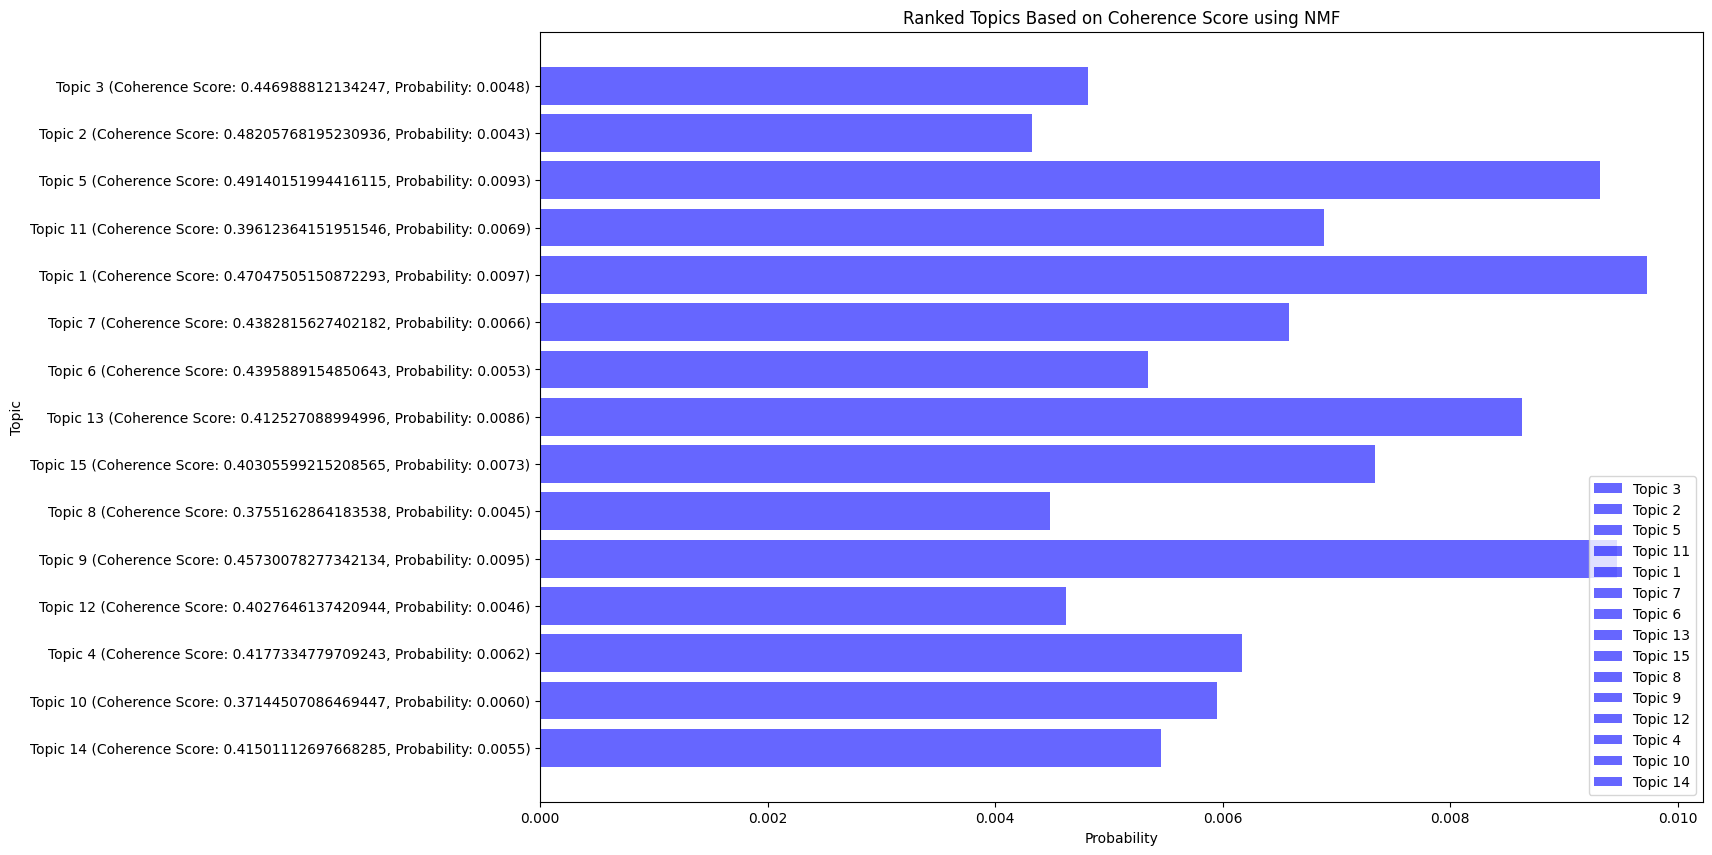

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# Read the dataset
df = pd.read_csv("modi_reviews.csv")

# Filter out NaN values and convert tweets to strings
df['Tweet'] = df['Tweet'].astype(str)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['Tweet'].str.split())
corpus = [dictionary.doc2bow(text) for text in df['Tweet'].str.split()]

# Build NMF model
nmf_model = models.Nmf(corpus, num_topics=15, id2word=dictionary)

# Compute coherence score for each topic
coherence_scores = []
probabilities = []

for i in range(15):
    topic_words = [word[0] for word in nmf_model.show_topic(i, topn=10)]
    cm = CoherenceModel(topics=[topic_words], texts=df['Tweet'].str.split(), dictionary=dictionary, coherence='c_v')
    coherence_scores.append(cm.get_coherence())

    topic_prob = nmf_model.show_topic(i, topn=10)
    topic_prob = {word[0]: word[1] for word in topic_prob}
    probabilities.append(topic_prob)

# Sort topics based on coherence score from highest to lowest
sorted_topics = [x for _, x in sorted(zip(coherence_scores, range(15)), reverse=True)]

# Extract and display the top 15 topics based on highest coherence score
topics = [nmf_model.show_topic(topic_num, topn=10) for topic_num in sorted_topics]

for idx, topic in enumerate(topics):
    print(f"Topic {idx + 1} (Coherence Score: {coherence_scores[sorted_topics[idx]]}, Probability: {probabilities[sorted_topics[idx]]}):")
    print(', '.join([word[0] for word in topic]))
    print("\n")

# Create a bar plot for the sorted topics based on coherence score
fig, ax1 = plt.subplots(figsize=(15, 10))

for i, topic_num in enumerate(sorted_topics):
    words = [word[0] for word in topics[i]]
    coherence_score = coherence_scores[i]
    probability = list(probabilities[i].values())[-1]

    ax1.barh([f"Topic {topic_num + 1} (Coherence Score: {coherence_score}, Probability: {probability:.4f})"], probability, color='blue', alpha=0.6, label=f"Topic {topic_num + 1}")

ax1.set_xlabel('Probability')
ax1.set_ylabel('Topic')
ax1.set_title('Ranked Topics Based on Coherence Score using NMF')
ax1.invert_yaxis()
ax1.legend()

plt.show()


In [27]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

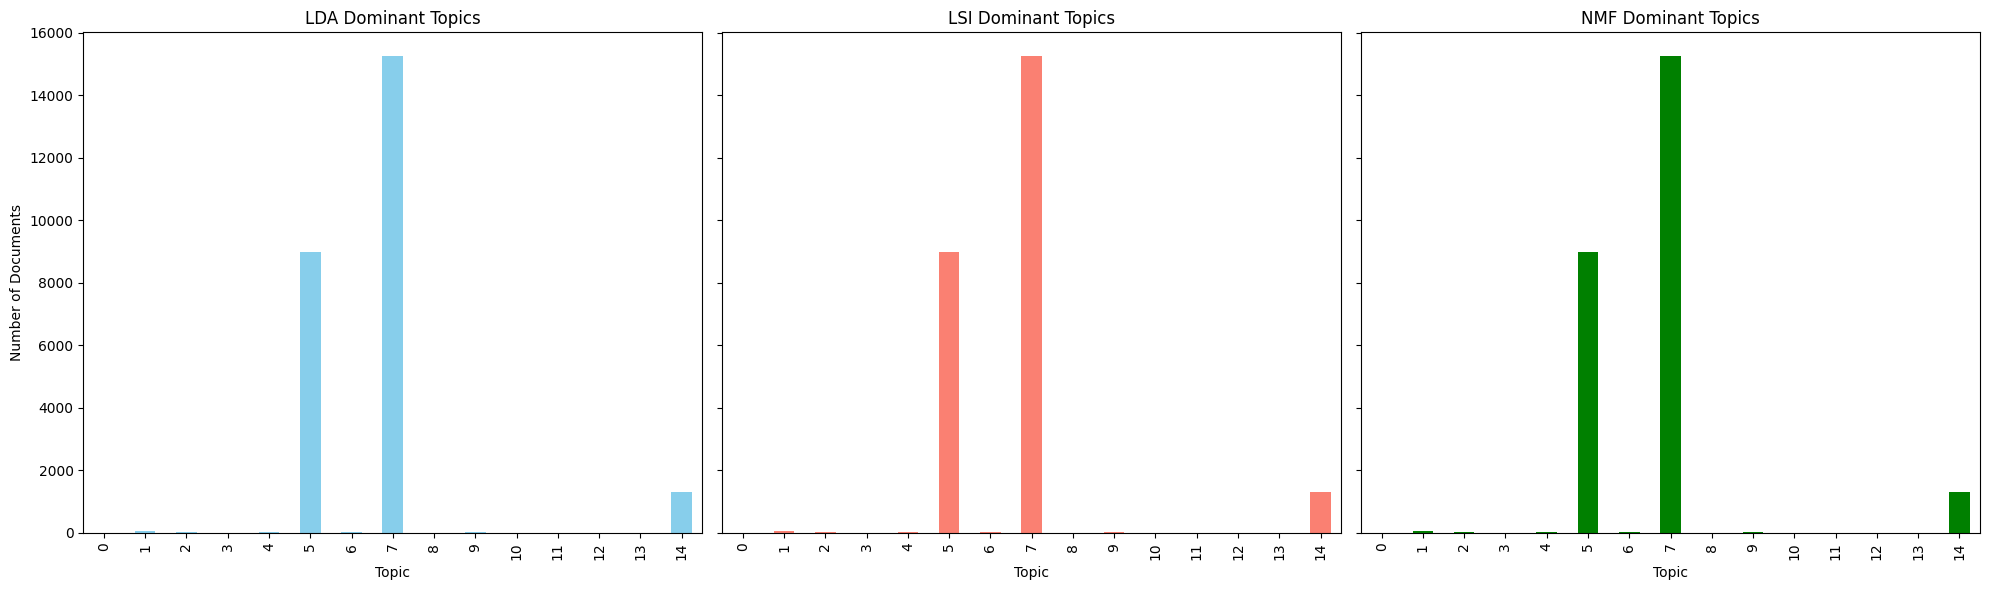

In [36]:
import pandas as pd
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("modi_reviews.csv")

# Filter out NaN values and convert tweets to strings
df['Tweet'] = df['Tweet'].astype(str)

# Create corpus and dictionary
dictionary = corpora.Dictionary(df['Tweet'].str.split())
corpus = [dictionary.doc2bow(text) for text in df['Tweet'].str.split()]

# LDA model
lda_model = models.LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)

# Get dominant topics for each document in the corpus
lda_topic_list = []
for doc in corpus:
    topics = lda_model.get_document_topics(doc)
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    lda_topic_list.append(dominant_topic)

# LSI model
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=15)

# Get dominant topics for each document in the corpus
lsi_topic_list = []
for doc in corpus:
    topics = lda_model.get_document_topics(doc)  # Using LdaModel's method for LSI
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    lsi_topic_list.append(dominant_topic)

# NMF model
nmf_model = models.Nmf(corpus, id2word=dictionary, num_topics=15)

# Get dominant topics for each document in the corpus
nmf_topic_list = []
for doc in corpus:
    topics = lda_model.get_document_topics(doc)  # Using LdaModel's method for NMF
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    nmf_topic_list.append(dominant_topic)

# Create dataframes for visualization
df_vis = pd.DataFrame({
    'Document': range(len(corpus)),
    'LDA': lda_topic_list,
    'LSI': lsi_topic_list,
    'NMF': nmf_topic_list
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# LDA
df_vis['LDA'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('LDA Dominant Topics')
axes[0].set_xlabel('Topic')
axes[0].set_ylabel('Number of Documents')

# LSI
df_vis['LSI'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('LSI Dominant Topics')
axes[1].set_xlabel('Topic')

# NMF
df_vis['NMF'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('NMF Dominant Topics')
axes[2].set_xlabel('Topic')

plt.tight_layout()
plt.show()

